In [1]:
#first download the datasets. The binaries were created from https://www.kaggle.com/mloey1/ahdd1
!wget https://raw.githubusercontent.com/zaidalyafeai/ARBML/master/datasets/Letters/test-ubyte.npz
!wget https://raw.githubusercontent.com/zaidalyafeai/ARBML/master/datasets/Letters/train-ubyte.npz

--2019-05-28 02:32:16--  https://raw.githubusercontent.com/zaidalyafeai/ARBML/master/datasets/Letters/test-ubyte.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 474740 (464K) [application/octet-stream]
Saving to: ‘test-ubyte.npz’

test-ubyte.npz      100%[===================>] 463.61K  --.-KB/s    in 0.02s   

2019-05-28 02:32:16 (22.9 MB/s) - ‘test-ubyte.npz’ saved [474740/474740]

--2019-05-28 02:32:18--  https://raw.githubusercontent.com/zaidalyafeai/ARBML/master/datasets/Letters/train-ubyte.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 O

# Imports 

In [0]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

# Load the Data 

In [3]:
x_train, y_train = np.load('train-ubyte.npz')['x'], np.load('train-ubyte.npz')['y']
x_test, y_test = np.load('test-ubyte.npz')['x'], np.load('test-ubyte.npz')['y']

print('training ', x_train.shape)
print('testing ', x_test.shape)

training  (13439, 1024)
testing  (3359, 1024)


# Preprocess the Data 

In [0]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], 32, 32, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# The Model 

In [5]:
# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(32, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(128, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(28, activation='softmax')) 
# Train model
adam = tf.train.AdamOptimizer()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxP

# Training 

In [7]:
model.fit(x_train, y_train, validation_split= 0.1, epochs=10)

Train on 12095 samples, validate on 1344 samples
Epoch 1/5
12095/12095 [==============================] - 2s 128us/sample - loss: 0.2942 - acc: 0.8995 - val_loss: 0.2072 - val_acc: 0.9315
Epoch 2/5
12095/12095 [==============================] - 1s 117us/sample - loss: 0.2569 - acc: 0.9124 - val_loss: 0.1814 - val_acc: 0.9397
Epoch 3/5
12095/12095 [==============================] - 1s 110us/sample - loss: 0.2181 - acc: 0.9271 - val_loss: 0.1692 - val_acc: 0.9501
Epoch 4/5
12095/12095 [==============================] - 1s 110us/sample - loss: 0.1974 - acc: 0.9327 - val_loss: 0.1637 - val_acc: 0.9457
Epoch 5/5
12095/12095 [==============================] - 1s 110us/sample - loss: 0.1804 - acc: 0.9394 - val_loss: 0.1426 - val_acc: 0.9546


# Testing 

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 95.50%


In [9]:
class_names = ['أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ','ق','ف', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي']
print(len(class_names))

28


# Inference 

['ح', 'ع', 'ج', 'خ', 'غ']


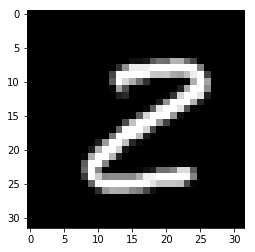

In [10]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze(), cmap = 'gray') 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
print([class_names[i] for i in ind])

# Save and Convert 

In [0]:
model.save('keras.h5')

# Zip and Download 

In [0]:
from google.colab import files
files.download('keras.h5')